In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading a csv file containing well names and UTM coordenates:
header = ['Well_Name', 'UTM_E', 'UTM_N']
data = pd.read_csv('../data/Coordenadas_MP.csv', sep=',', names=header, header=0)
data

,Well_Name,UTM_E,UTM_N
0,1-BRSA-84-BA(1-FRT-1-BA),562179.30,8609874.60
1,1MP-0001-BA,563482.40,8608924.30
2,1MP-0002-BA,562134.03,8608618.93
3,1MP-0003-BA,560798.53,8610888.49
4,3MP-0004-BA,562165.63,8607810.93
5,3MP-0005-BA,561587.00,8611254.30
6,3MP-0006-BA,561524.54,8609007.58
7,3MP-0007-BA,560786.90,8610059.30
8,3MP-0008-BA,560747.80,8611629.50
9,3MP-0009-BA,560706.30,8613273.90


In [4]:
#creating a dictionary to save the values of each columns:
coord={}
for i in range (np.shape(data)[1]):
    dicio = {header[i]: list(data[header[i]].values)}
    coord.update(dicio)

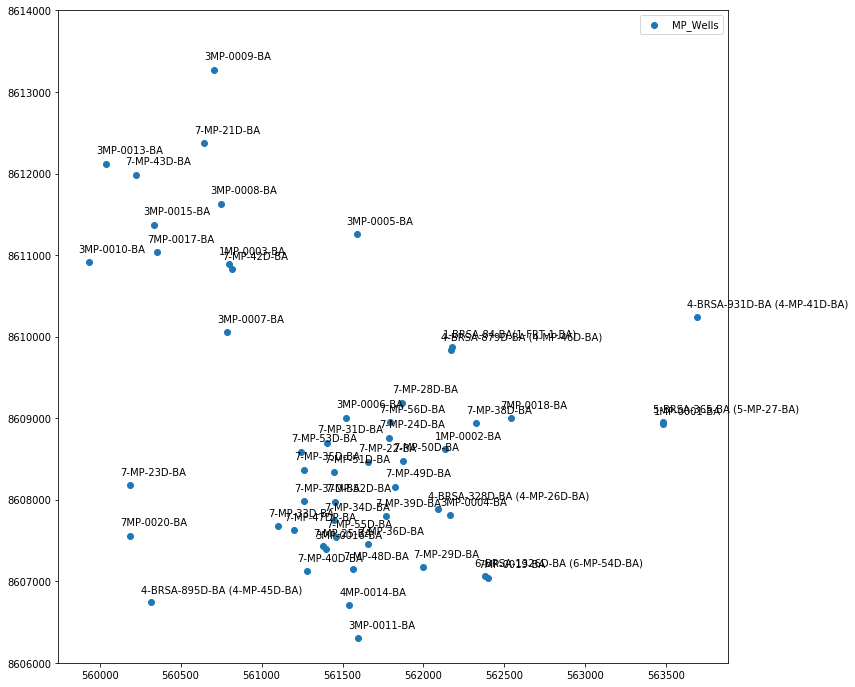

In [5]:
#plotting a map using the well's coordinates:
plt.figure(figsize=(12,12))
plt.scatter(coord[header[1]], coord[header[2]], label='MP_Wells')
#creating a label for each data point:
for i in range(np.shape(data)[0]):
    plt.annotate(coord[header[0]][i], xy=(coord[header[1]][i],coord[header[2]][i]), xytext=[-10,10],
                 textcoords='offset points',
                 #arrowprops=dict(facecolor='black', shrink=0.01)
                )
plt.ylim(8606000, 8614000)
plt.legend()
plt.show()

In [6]:
#setting where to crop the map
ycrop = 8610000
#creating a new dictionary with the values needed
coord_update = {}
update={}
idx = []
for i in range (np.shape(data)[0]):
    if coord[header[2]][i] >= ycrop:
        idx.append(i)
    else:
        coord_update[coord['Well_Name'][i]] = {}
        coord_update[coord['Well_Name'][i]]['UTM_E'] = coord['UTM_E'][i]
        coord_update[coord['Well_Name'][i]]['UTM_N'] = coord['UTM_N'][i]

In [7]:
x = []
y = []
well_name = []
#consulting all the new values of the dictionary
for i in coord_update:
    x.append(coord_update[i]['UTM_E'])
    y.append(coord_update[i]['UTM_N'])
    well_name.append(i)

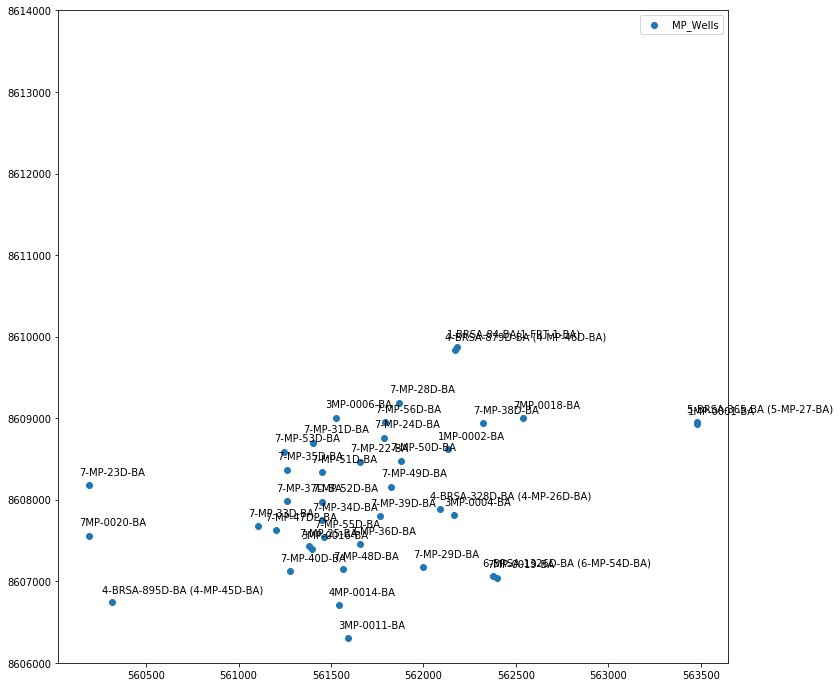

In [8]:
#plotting the new map without well with UTM_N more than 8610000:
plt.figure(figsize=(12,12))
plt.scatter(x, y, label='MP_Wells')
#creating a label for each data point:
for i in range(len(coord_update)):
    plt.annotate(well_name[i], xy=(x[i],y[i]), xytext=[-10,10],
                 textcoords='offset points',
                 #arrowprops=dict(facecolor='black', shrink=0.01)
                )
plt.ylim(8606000, 8614000)
plt.legend()
plt.show()